In [26]:
from MLP.MLP import Dense, ActivationSoftmax, CategoricalCrossEntropyLoss, ActivationReLU, Backpropagation
import numpy as np
from keras.datasets import mnist
from tqdm.notebook import tqdm

In [27]:
#Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_train.dtype)

(60000, 28, 28)
uint8


In [28]:
from data.ImageLoader import preprocessImage
x_train = preprocessImage(x_train) #Collapse last dim and normalize [0, 255] -> [0, 1]
x_test = preprocessImage(x_test)
print(x_train.shape)
print(x_train.dtype)

(60000, 784)
float64


In [29]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [30]:
# Change from sparse into one hot encoding
n_values = np.max(y_train) + 1
y_train = np.eye(n_values)[y_train]
y_test = np.eye(n_values)[y_test]
print(y_train.shape)

(60000, 10)


## Creating Dense Model
https://www.tensorflow.org/datasets/keras_example <br>
Expected to yield result 0.98 Train Acc, 0.97 Test Acc

In [31]:
# Hyperparameter
batch_size = 32
learning_rate = 0.1
epochs = 10

In [32]:
#Create Layer
dense_0 = Dense(784, 128)
activation0 = ActivationReLU()
dense_1 = Dense(128, 10)
activation1 = ActivationSoftmax()
CELoss = CategoricalCrossEntropyLoss()
backprop = Backpropagation(learning_rate)


In [33]:
def accuracy(y_pred, y_true):
    return (np.argmax(y_pred, axis=-1) == np.argmax(y_true, axis=-1)).mean()

In [9]:
#Training
loss = []
acc = []

n_data = len(x_train)
n_batch = n_data//batch_size

remainder = n_data%batch_size
if(remainder!=0):
    n_batch += 1

for _ in tqdm(range(epochs), leave=False):
    batch_loss = []
    batch_acc = []

    for i in tqdm(range(n_batch), leave=False):
        #if batch can not be equally divided
        #batch all of the remainder data
        if(i*batch_size+batch_size>n_data):
            x_batch = x_train[i*batch_size:]
            y_batch = y_train[i*batch_size:]
        else:
            x_batch = x_train[i*batch_size: (i+1) *batch_size]
            y_batch = y_train[i*batch_size: (i+1) *batch_size]

        #Forward pass
        dense_0.forward(x_batch)
        activation0.forward(dense_0.output)
        dense_1.forward(activation0.output)
        activation1.forward(dense_1.output)

        #Backward pass
        CELoss.backward(activation1.output, y_batch)
        dense_1.backward(CELoss.dinputs)
        activation0.backward(dense_1.dinputs)
        dense_0.backward(activation0.dinputs)

        #Update Weight
        backprop.updateParams(dense_1)
        backprop.updateParams(dense_0)

        #Calculate Metrics/ batch
        batch_acc.append(accuracy(activation1.output, y_batch))
        print(CELoss.forward(activation1.output, y_batch))
        batch_loss.append(CELoss.forward(activation1.output, y_batch))
    
    acc.append(np.mean(batch_acc))
    loss.append(np.mean(batch_loss))


In [11]:
#Visualize result
import matplotlib.pyplot as plt

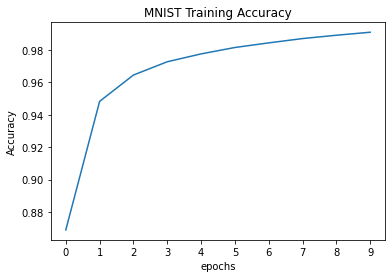

In [20]:
plt.plot(acc)
plt.title('MNIST Training Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.xticks(range(10))
plt.show()


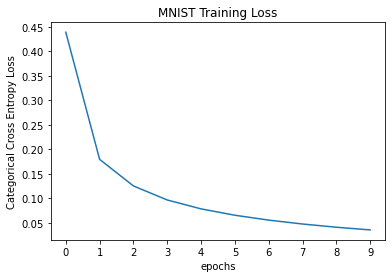

In [21]:
ot(loss)
plt.title('MNIST Training Loss')
plt.xlabel('epochs')
plt.ylabel('Categorical Cross Entropy Loss')
plt.xticks(range(10))
plt.show()

In [25]:
#Check Test Acc
dense_0.forward(x_test)
activation0.forward(dense_0.output)
dense_1.forward(activation0.output)
activation1.forward(dense_1.output)

print(accuracy(activation1.output, y_test))
print(np.mean(CELoss.forward(activation1.output, y_test)))

0.9762
0.080569597452808
